In [1]:
from sklearn.datasets import load_digits, load_iris

from sklearn.model_selection import train_test_split

import numpy as np

In [2]:
digits = load_iris()
print(digits.data.shape)
print(digits.target.shape)

(150, 4)
(150,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data/np.max(digits.data), digits.target, test_size=0.1, random_state=42)


In [4]:
from nn.layer import Layer


class Model:
    def __init__(self, in_dim, out_dim):
        self.layer1 = Layer(in_dim, 5)
        self.layer2 = Layer(5, 5)
        self.layer3 = Layer(5, out_dim)
        self.in_dim = in_dim
        self.out_dim = out_dim

    def forward(self, x):
        out = self.layer1.forward(x)
        out = [x.relu() for x in out]
        out = self.layer2.forward(out)
        out = [x.relu() for x in out]
        out = self.layer3.forward(out)
        # out = [x.relu() for x in out]
        # Apply softmax activation to the output layer
        exp_out = [x.exp() for x in out]
        sum_exp = sum(exp_out)
        out = [x / sum_exp for x in exp_out]
        return out

    def zero_grad(self):
        for layer in [self.layer1, self.layer2,self.layer3]:
            for p in layer.weights:
                p.grad = 0
            for p in layer.biases:
                p.grad = 0
                
    def learn(self, learning_rate):
 
        for layer in [self.layer1, self.layer2,self.layer3]:
            for p in layer.weights:
                p.value = p.value - (learning_rate * p.grad)
          
            for p in layer.biases:
                p.value = p.value - (learning_rate * p.grad)
           


In [5]:
model = Model(len(X_train[0]), len(np.unique(y_train)))

batch_size = len(X_train)//10
epochs = 100

accuracy_list = []

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    learning_rate = .9 / (1 + 0.1 * epoch)  # Stochastic Gradient Descent (SGD) with learning rate decay
    # learning_rate = 0.3
    print(f"learning_rate: {learning_rate}")
    for i in range(0, len(X_train), batch_size):
        model.zero_grad()
        error_list = []
        for j in range(batch_size):
            if i+j >= len(X_train):
                break
            x = (X_train[i+j]/1.0).tolist()
            y = int(y_train[i+j])
            out = model.forward(x)
            # errors = [
            #     (out[i]-1 if i == y else out[i])**2 for i in range(len(out))
            # ]
            # Calculate cross-entropy error
            target = [1 if i == y else 0 for i in range(len(out))]
            errors = [-target[i] * out[i].sigmoid().log() - (1 - target[i]) * (1 - out[i].sigmoid()).log() for i in range(len(out))]
            error_list.extend(errors)
        loss = sum(error_list)/len(error_list)
        loss.grad=1
        loss.backward()
        model.learn(learning_rate)
        # print(f"loss: {loss.value}")

    # evaluate
    correct = 0
    import numpy as np
    for i in range(len(X_test)):
        x = (X_test[i]/1.0).tolist()
        y = int(y_test[i])
        out = model.forward(x)
        if np.argmax([o.value for o in out]) == y:
            correct += 1
 
    print(f"Accuracy: {correct/len(X_test):.2f}")
    accuracy_list.append(correct/len(X_test))

Epoch 1/100
learning_rate: 0.9
Accuracy: 0.20
Epoch 2/100
learning_rate: 0.8181818181818181
Accuracy: 0.20
Epoch 3/100
learning_rate: 0.75
Accuracy: 0.20
Epoch 4/100
learning_rate: 0.6923076923076923
Accuracy: 0.60
Epoch 5/100
learning_rate: 0.6428571428571429
Accuracy: 0.60
Epoch 6/100
learning_rate: 0.6
Accuracy: 0.60
Epoch 7/100
learning_rate: 0.5625
Accuracy: 0.60
Epoch 8/100
learning_rate: 0.5294117647058824
Accuracy: 0.60
Epoch 9/100
learning_rate: 0.5
Accuracy: 0.60
Epoch 10/100
learning_rate: 0.4736842105263158
Accuracy: 0.60
Epoch 11/100
learning_rate: 0.45
Accuracy: 0.60
Epoch 12/100
learning_rate: 0.42857142857142855
Accuracy: 0.60
Epoch 13/100
learning_rate: 0.40909090909090906
Accuracy: 0.67
Epoch 14/100
learning_rate: 0.391304347826087
Accuracy: 0.67
Epoch 15/100
learning_rate: 0.37499999999999994
Accuracy: 0.73
Epoch 16/100
learning_rate: 0.36
Accuracy: 0.73
Epoch 17/100
learning_rate: 0.34615384615384615
Accuracy: 0.73
Epoch 18/100
learning_rate: 0.3333333333333333
Accu

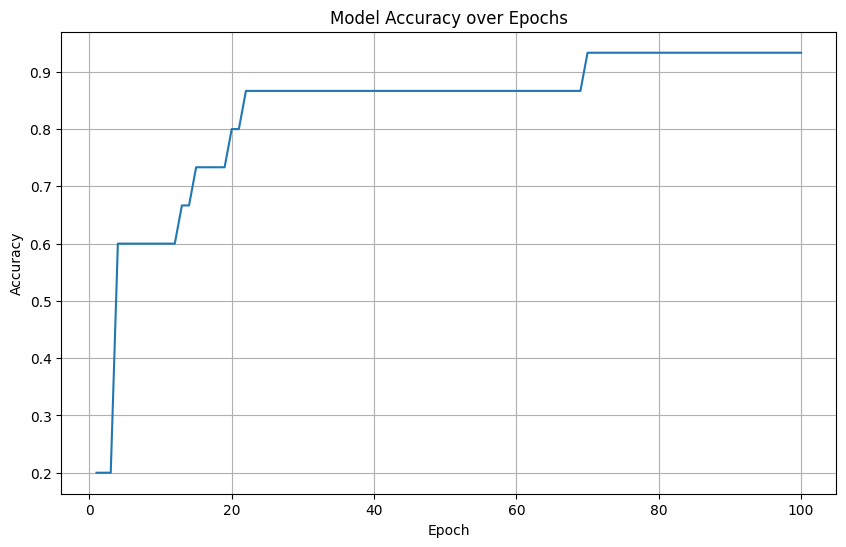

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), accuracy_list)
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
